#SDS 2021 Spring - Deep Learning Models 실습

##Contents
- Perceptron
- Multi-layer Perceptron / Fully Connected Layers (FC Layer)
- CNN (Convolutional Neural Network)
- RNN (Recurrent Neural Network)

Colab 환경 세팅

In [ ]:
import os
import copy
from os.path import join
import warnings

import torch
import torch.nn as nn
import numpy as np
import random

# colab에서 나오는 warning들을 무시합니다.
warnings.filterwarnings('ignore')

# 결과 재현을 위해 해당 코드에서 사용되는 라이브러리들의 Seed를 고정합니다.
def seed_everything(random_seed):
    torch.manual_seed(random_seed)
    torch.set_deterministic(True)
    torch.cuda.manual_seed(random_seed)
    torch.cuda.manual_seed_all(random_seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    np.random.seed(random_seed)
    random.seed(random_seed)

seed = 1
seed_everything(seed)

## Numpy

Python을 사용하면 필수적으로 배우게되는 라이브러리 Numpy를 소개합니다. </br>
Numpy는 대규모 vector와 matrix를 쉽게 다룰 수 있게하는 파이썬 라이브러리입니다.</br>
</br>
Matrix Multiplication을 기본 Python List로 구현한 것과 Numpy로 구현한 것을 비교해보겠습니다.

In [ ]:
import numpy as np
import time

# python list
py_mat_a = [[1, 2], 
            [3, 4]] 
py_mat_b = [[2, 1], 
            [4, 3]]
print(type(py_mat_a))

# 행렬 = 행과 열
# matrix = row & column

# python list로 구현 시
def pylist_matmul(py_mat_a, py_mat_b):
    # 각 원소들을 곱한 값을 저장하는 곳
    result = []

    if len(py_mat_a[0]) != len(py_mat_b):
        print("두 행렬은 곱할 수 없습니다. A의 열 크기와 B의 행 크기가 같지 않습니다.")
    else:
        # 행렬 a의 행 iteration
        for i in range(len(py_mat_a)):
            row = [] # 열 단위로 
            # 행렬 b의 열 iteration
            for j in range(len(py_mat_b[0])):
                n = 0
                # 행렬 b의 행 iteration
                for k in range(len(py_mat_b)):
                    n += py_mat_a[i][k] * py_mat_b[k][j]
                row.append(n)
            result.append(row)
    return result

result = pylist_matmul(py_mat_a, py_mat_b)
print(result)

In [ ]:
# numpy로 구현 시.
np_mat_a = np.array([[1, 2], 
                     [3, 4]]) # numpy array
np_mat_b = np.array([[2, 1], 
                     [4, 3]])
print(type(np_mat_a)) # n-dimensional array == ndarray

result = np.matmul(np_mat_a, np_mat_b) # 코드 한 줄로 행렬 곱연산

print(result)

Numpy array를 사용하는 것이 더 간단하게 구현이 가능하고, 큰 데이터를 다룰 때 속도가 빠릅니다. 

간단히 python list와 numpy array의 벡터 크기에 따른 연산 속도 차이를 알아보겠습니다.

In [ ]:
import time
import numpy as np

size_of_vec = 100000 # try 100 & 100000

def pure_python_version(X, Y):
    start = time.time()
    Z = [X[i] + Y[i] for i in range(len(X))]
    return time.time() - start

def numpy_version(X, Y):
    start = time.time()
    Z = X + Y
    return time.time() - start

X_list = range(size_of_vec)
Y_list = range(size_of_vec)

X_ndarray = np.arange(size_of_vec)
Y_ndarray = np.arange(size_of_vec)

t1 = pure_python_version(X_list, Y_list)
t2 = numpy_version(X_ndarray, Y_ndarray)
print(t1, t2)
print("Numpy가 Python보다" + str(t1/t2) + "배 빠릅니다! (아마도? 적어도 Colab에서는!)")

### Numpy Tutorial
간단히 Numpy의 연산들을 알아보겠습니다.

Numpy array 생성

In [ ]:
# Python List로부터 배열 생성
arr_a = np.array([1,2,3,4])

# 특정 값으로 채운 배열
arr_zeros = np.zeros((2,2)) # (2,2)크기의 0으로 채워진 배열
arr_ones = np.ones((1,6)) # (1,6) 크기의 1로 채워진 배열 
arr_full = np.full((2,2), 10) # 10으로 채워진 (2,2)크기의 배열
arr_eye = np.eye(2) # 2크기의 diagonal matrix (대각행렬)

bigger = np.arange(10) # [0, 1, 2, ... ,9]
smaller = np.flip(bigger) # [9, 8, 7, ..., 0] # 9에서부터 0까지 1씩 작아지는 크기 10의 배열. bigger 배열의 순서를 역으로 뒤집었음(flip).

# 무작위 값으로 채워진 배열
rand_between0_1 = np.random.random((2,2)) # 0~1 사이의 값으로 채워진 (2,2) 크기의 배열
rand_between0_100 = np.round(100 * np.random.random((4,4))) # 0~100 사이의 값으로 채워진 (4,4) 크기의 배열
# rand_between0_1 배열에 100을 곱한 후, 1의 자리까지 반올림.

# 위와 같이 배열 전체에 scalar의 곱도 가능하고 반올림도 가능.
print("0~100 사이의 값으로 채워진 (4,4) 크기의 배열")
rand_between0_100

Numpy array 모양 파악 및 변형

In [ ]:
print("bigger 배열 내 값들")
print(bigger)
print("bigger 배열의 모양")
print(bigger.shape)

print('='*100) # 구분선

print("bigger 배열을 5행 ?(=배열 길이/5)열의 모양로 바꿨을 때")
print(bigger.reshape(5, -1))
print(bigger.reshape(5, -1).shape)

배열 dimension 추가, 제거

In [ ]:
# 배열 dimension 추가, 제거

print("bigger 배열의 모양을 (10, 1)로.")
bigger_dim = bigger.reshape(10,1)
print(bigger_dim.shape)
# Tip : (10, )의 배열 형태로는 실행되던 코드가 input이 (10, 1)의 형태를 가졌을 때에는 실행이 안되는 경우가 있음

print(bigger_dim.squeeze().shape) # squeeze() : shape에서 크기가 1인 차원을 없앰.

print(bigger[0]) # 0 출력
print(bigger_dim.reshape(10, 1)[0]) # [0]출력
print(bigger_dim.reshape(10, 1).squeeze()[0]) # 0 출력

Numpy array 인덱싱(Indexing)

In [ ]:
a = np.arange(16).reshape(4,4)
print(a)
print('='*100) # 구분선

print(a[0,0]) # 0행 0열 값
print(a[0:2, 0]) # 0열의 0이상 2미만 행들(0행과 1행)의 값
print(a[:, 0].reshape(-1,1)) # 0열의 모든 값 / 열의 값을 가져와도 값을 가장 낮은 차원으로 줄여줌.
print(a[0, :]) # 0행의 모든 값

##Pytorch
Tensorflow와 더불어 인기있는 딥러닝 프레임 워크</br>

**딥러닝 프레임워크란?**</br>
<ul>
<li>복잡한 Backpropagation 계산을 자동으로 수행</li>
<li>GPU 가속 지원</li>
</ul>

**Pytorch?**</br>
<ul>
<li>직관적 문법과 쉬운 디버깅으로 연구자들 사이 인기</li>
<li>Numpy와 닮은 부분이 많음.</li>
</ul>


###Python, Numpy, Pytorch의 자료형과 변환

1. Python의 자료형 
= **list** (리스트) 

2. Numpy의 기본 자료형
= **array** (배열, ndarray)

3. Pytorch의 자료형
= **tensor** (텐서, ndarray와 유사한 자료형)


numpy에서 사용하려면 numpy의 자료형으로,
pytorch에서 사용하려면 torch의 자료형으로 변환해주어야 합니다.

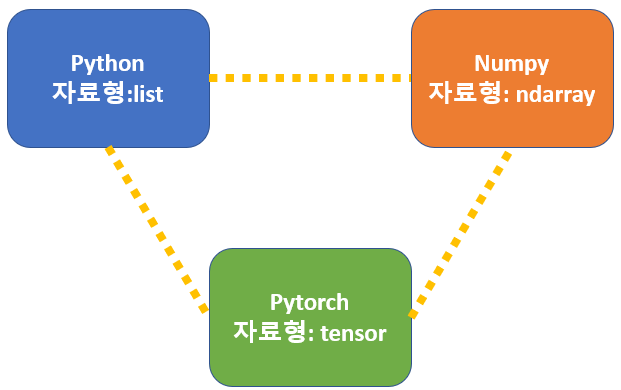

In [ ]:
py_list = [1, 2, 3]
np_from_pylist = np.array(py_list)
torch_from_pylist = torch.FloatTensor(py_list)
torch_from_pylist = torch.tensor(py_list).float() # torch tensor 변환 후 자료형 변경

torch_tensor = torch.rand(4)
py_from_tensor = torch_tensor.tolist()
np_from_tensor = torch_tensor.numpy()

numpy_array = np.array([[1,2],[3,4]])
py_from_ndarray = numpy_array.tolist()
torch_from_ndarray = torch.tensor(numpy_array).float()

### Pytorch로 구현한 Perceptron

### - Naive Implementation
### - Smarter Implementation

문제 예시) 위 평면에 찍힌 점들을 분류

In [ ]:
import matplotlib.pyplot as plt

X = np.array([[2, 2], [1, 3], [2, 3], [5, 3], [2, 4], [3, 4], 
              [6, 4], [1, 5], [5, 5], [4, 6], [6, 6], [5, 7]])
Y = np.array([0, 0, 0, 1, 0, 0, 
              1, 0, 1, 1, 1, 1])

# 위 X,Y 데이터를 점 그래프로 표현 / 라이브러리 이름 matplotlib
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)

#### Naive Implementation: List all modules

가장 간단한 모델 정의 방법은 모든 모듈을 나열(Linear 후 Sigmoid activation function)하는 것 입니다. </br>
정의 후에는, 입력을 각각의 모듈에 매번 넘겨줍니다.</br>
각 모듈을 nn.Sequential로 묶어 줄 수 있습니다. </br>


In [ ]:
x = torch.FloatTensor(X) # numpy array로 된 data를 pytorch에 사용할 수 있게끔 float 형식의 torch.tensor로 변환
y = torch.FloatTensor(Y)

In [ ]:
import torch
from torch import nn, optim

# 퍼셉트론 model (naive implementation)
linear = nn.Linear(2,1,bias = True)
sigmoid = nn.Sigmoid()
model = nn.Sequential(linear , sigmoid).to("cpu")

# loss and optimizer
criterion = nn.BCELoss().to("cpu") # Binary classification을 위한 loss 설정
optimizer = torch.optim.SGD(model.parameters(), lr=1) # 가장 기본적인 SGD(Stochastic Gradient Descent) optimizer 

for step in range(100):
    pred = model(x)
    cost = criterion(pred.squeeze(), y)
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    if step % 10 == 0:
        print(f'[{step}th Epoch] Loss {cost.item():.3f}')

prediction = model(x).detach()
prediction = prediction.numpy()

마지막 Prediction은 Sigmoid activation을 통과하여 0과 1사이의 값으로 나오는데, 이를 확률에 대입하여 해석해보면, </br>
확률이 0.5 이상이면 1로 분류, 확률이 0.5 미만이면 0으로 분류할 수 있습니다.

In [ ]:
# classification 분류문제
# 확률이 0.5 이상이면 1로 분류, 확률이 0.5 미만이면 0으로 분류
prediction[prediction>=0.5]=1
prediction[prediction<0.5]=0

prediction

In [ ]:
print("Perceptron이 예측한 값\t| 실제 정답")
print("="*40)
correct = 0
for i in range(len(prediction)):
    print(f'\t{int(prediction[i])}\t\t|     {int(y.numpy()[i])}')
    if int(prediction[i])==int(y.numpy()[i]):
        correct = correct + 1

print(f'\n Accuracy(정확도) : {correct/len(prediction)*100.}%')

Model이 학습한 그래프 그리기

학습한 모델을 시각화해보겠습니다.

In [ ]:
def draw_model_prediction(X, Y, model):
    # Inputs :
    # X, Y - numpy array
    # model - pytorch model

    # 평면에 색을 칠하기 위해 0.02 간격의 점들에 대해 모두 예측값을 구해 그래프를 그리는 함수. (점이 모여 선이 되고, 선이 모여 면이 되는.)

    # 2차원 공간의 점들의 좌표. x와 y의 최대, 최소값을 구하여, 그래프의 가로축 세로축 길이를 결정. 
    h = .02

    # x는 가로축, y는 세로축을 의미. (그래프를 그릴 평면의 사이즈 설정)
    horizontal_min, horizontal_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    vertical_min, vertical_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    # .02 간격으로 min값과 max 사이 좌표 matrix를 생성.
    xx, yy = np.meshgrid(np.arange(horizontal_min, horizontal_max, h),
                        np.arange(vertical_min, vertical_max, h))

    # 공간 상의 점들(영역)에 대한 모델의 예측 값들을 구함.
    fig, ax = plt.subplots()
    xxx = np.c_[xx.ravel(), yy.ravel()]

    xxx_tensor = torch.FloatTensor(xxx)
    Z = model(xxx_tensor)

    Z = Z.detach().numpy()

    # classification 분류문제 / 0.5 이상이면 1, 0.5 미만이면 0
    Z[Z>=0.5]=1
    Z[Z<0.5]=0

    # 예측 값(0 or 1)에 색을 넣고 그래프에 (영역을) 그린다.
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=plt.cm.Paired)
    ax.axis('off')

    # 본래 우리가 예측하려던 입력 데이터(점)를 그린다
    ax.scatter(X[:, 0], X[:, 1], c=Y)
    ax.set_title('Dot Classifier')

In [ ]:
draw_model_prediction(X, Y, model)

Perceptron으로 OR, AND 게이트도 학습 가능합니다.</br>
아래 셀을 실행시켜 데이터를 바꾼 후 위의 코드를 다시 실행해 잘 학습되었는지 확인해봅시다.

In [ ]:
# OR Gate
x = torch.FloatTensor([[0,0],[0,1],[1,0],[1,1]]).to("cpu")
y = torch.FloatTensor([0, 1, 1, 1])
X = x.numpy()
Y = y.numpy()

In [ ]:
# AND Gate
x = torch.FloatTensor([[0,0],[0,1],[1,0],[1,1]]).to("cpu")
y = torch.FloatTensor([0, 0, 0, 1])
X = x.numpy()
Y = y.numpy()

In [ ]:
draw_model_prediction(X, Y, model) # Perceptron으로 예측한 OR와 AND

### MLP with XOR Problem

---

Perceptron은 단순한 데이터, 즉 선형 분리가 가능한 (Linearly separable)한 데이터에서는 아주 잘 동작합니다.<br>
하지만 데이터가 선형으로 분리가 가능하지 않다면 동작하지 않습니다.

대표적인 문제가 XOR Problem 입니다.<br>
XOR는 Exclusive OR의 약자로 두 입력 중 오직 하나만이 참일 때 참, 그 외에는 거짓이 되는 연산입니다. (Not equal 연산)

<h2 align="center">
  <img src='https://miro.medium.com/max/300/0*LYlt6CZJHOJkNRHJ.' height=147 width=300/>
</h2>

<!-- ![XOR](https://miro.medium.com/max/300/0*LYlt6CZJHOJkNRHJ.) -->


In [ ]:
# XOR Problem
x = torch.FloatTensor([[0,0],[0,1],[1,0],[1,1]])
y = torch.FloatTensor([0, 1, 1, 0])

In [ ]:
import matplotlib.pyplot as plt

# tensor를 numpy array로 변환
x_np = x.numpy()
y_np = y.numpy()

# True 인 경우 빨간 o로, False인 경우 파란 x로 그래프 표현
XOR_TRUE = x_np[y_np==1]
XOR_FALSE = x_np[y_np==0]

plt.scatter(XOR_TRUE[:, 0], XOR_TRUE[:, 1], color='r', marker='o', s=300)
plt.scatter(XOR_FALSE[:, 0], XOR_FALSE[:, 1], color='b', marker='x', s=300)

AND와 OR를 손쉽게 분류했던 Perceptron Model.</br>
XOR 분류가 가능할까요?

In [ ]:
import torch
from torch import nn, optim

# Perceptron model (naive implementation)
linear = nn.Linear(in_features=2, out_features=1, bias=True)
sigmoid = nn.Sigmoid()
model = nn.Sequential(linear , sigmoid).to("cpu")

# loss, optimizer
criterion = nn.BCELoss().to("cpu")
optimizer = optim.SGD(model.parameters(), lr=1)

# train
for step in range(100):
    pred = model(x).squeeze()
    cost = criterion(pred, y)
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    if step % 10 == 0:
        print(step, cost.item())

prediction = model(x).detach()
prediction

In [ ]:
draw_model_prediction(x_np, y_np, model) # Perceptron으로 예측한 XOR


2차원 좌표평면 상 어떤 직선을 그어도 XOR은 분류할 수 없습니다.<br>

따라서 Perceptron으로는 분류가 불가능합니다.

하나의 직선 혹은 하나의 Perceptron으로 분류할 수 없다면 여러 개를 사용해서 분류할 수 있을까요?<br>
Multilayer Perceptron (MLP)로 XOR 문제를 풀어보도록 하겠습니다.

#### **XOR 문제 해결**


구현할 모델은 아래와 같이 Perceptron을 쌓은 MLP 입니다.

<h2 align="left">
  <img src='https://miro.medium.com/max/630/1*qA_APGgbbh0QfRNsRyMaJg.png' height=250 width=400/>
</h2>

[이미지 출처: Neural Network XOR Application and Fundamentals](https://becominghuman.ai/neural-network-xor-application-and-fundamentals-6b1d539941ed)


#### Smarter Implementation: Build a single model

Perceptron처럼 간단한 모델을 만들 때는 괜찮지만, 모델이 복잡해지면 일일이 입력으로 넘겨주는 것이 쉽지 않습니다.

따라서, 손쉬운 사용을 위해, 각각의 모듈을 합쳐 **나만의 모듈**을 새로 정의할 수 있습니다.

아래 ```MLPClassifier```를 확인해봅니다.
```MLPClassifier```는 ```nn.Module```을 상속하여 PyTorch와 결합하도록 합니다.
```__init__``` 와 ```forward``` 함수를 필수적으로 구현하여야 합니다.
* ```__init__```는 모델에 필요한 sub module을 정의합니다.
* ```forward```는 입력을 받아 모델이 원하는 출력을 뱉습니다.


In [ ]:
class MLPClassifier(nn.Module):
    def __init__(self):
        super(MLPClassifier, self).__init__() 
        self.linear1 = nn.Linear(in_features=2, out_features=2,bias=True)
        self.linear2 = nn.Linear(2,1,bias=True) # in_features, out_features 생략도 가능.
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        hidden = self.sigmoid(self.linear1(x))
        hidden = self.linear2(hidden)
        return self.sigmoid(hidden).squeeze()

In [ ]:
from torch import nn, optim

# Naive Implementation

# linear1 = nn.Linear(in_features=2, out_features=2,bias=True)
# linear2 = nn.Linear(2,1,bias=True) # in_features, out_features 생략
# sigmoid = nn.Sigmoid()
# model = nn.Sequential(linear1, sigmoid, linear2, sigmoid).to("cpu")

model = MLPClassifier() # Smarter Implementation

# Loss & Optimizer
criterion = nn.BCELoss().to("cpu")
optimizer = optim.SGD(model.parameters(), lr=1)

for step in range(10001):
    hypo = model(x)
    cost  = criterion(hypo, y)
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    if step % 1000 == 0:
        print(step, cost.item())

# 학습 종료
prediction = model(x).detach().numpy()
prediction

In [ ]:
draw_model_prediction(x_np, y_np, model) # 하나의 Perceptron이 아닌 MLP로 예측한 XOR

MLP는 XOR을 어떻게 풀었을까? </br>
학습이 완료된 MLP의 hidden node(perceptron)들은 어떻게 학습되었을까요?

In [ ]:
hidden_layer = model.sigmoid(model.linear1(x)).detach().numpy()

np.set_printoptions(precision=3, suppress=True)

print("[Hidden Node Values]")
print("Input\tH1\tH2")

h1 = hidden_layer[:, 0]
h2 = hidden_layer[:, 1]

print(x_np[0], ' ', '%.2f' % h1[0], '%.2f' % h2[0])
print(x_np[1], ' ', '%.2f' % h1[1], '%.2f' % h2[1])
print(x_np[2], ' ', '%.2f' % h1[2], '%.2f' % h2[2])
print(x_np[3], ' ', '%.2f' % h1[3], '%.2f' % h2[3])

### 직접 Deep Learning Model 만들고 학습하기


###런타임 다시 시작
GPU를 활용하여 학습하기 위해 Colab의 설정을 바꿔줍니다.</br>
런타임 메뉴바 - 유형 변경 - 하드웨어 가속기 - 'GPU' 선택 - 런타임 다시 시작 </br>

cf. 아래 코드들은 GPU 가속 없이도 실행이 가능합니다. CPU로 딥러닝 모델을 학습할 때 걸리는 시간도 확인 가능합니다.

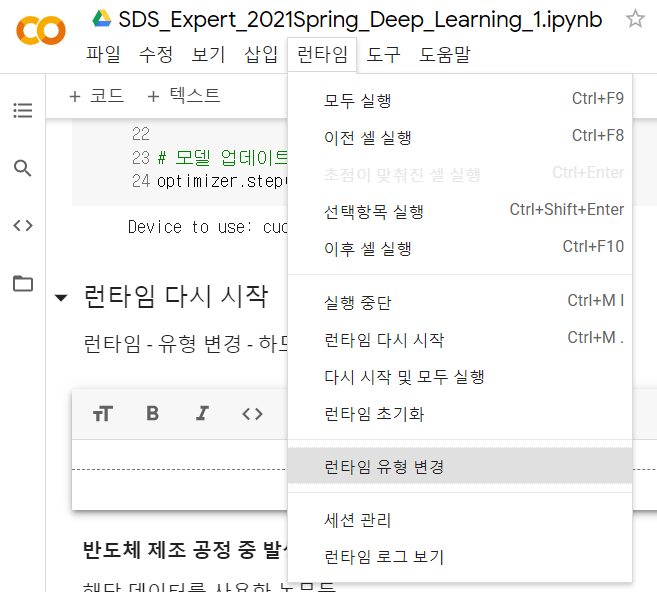

In [ ]:
import os
import copy
from os.path import join
import warnings

import torch
import torch.nn as nn
import numpy as np
import random

# colab에서 나오는 warning들을 무시합니다.
warnings.filterwarnings('ignore')

# 결과 재현을 위해 해당 코드에서 사용되는 라이브러리들의 Seed를 고정합니다.
def seed_everything(random_seed):
    torch.manual_seed(random_seed)
    torch.set_deterministic(True)
    torch.cuda.manual_seed(random_seed)
    torch.cuda.manual_seed_all(random_seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    np.random.seed(random_seed)
    random.seed(random_seed)

seed = 1
seed_everything(seed)

#### Model 만들기
아래 설명을 만족하는 ```MLPClassifier_complex```을 완성하시오. </br>
**[모듈]**
- ```self.relu```
  - 1차원에 적용
- ```self.linear1```
  - 입력: 4096차원
  - 은닉: 512차원
- ```self.linear2```
  - 입력: 512차원
  - 출력: 256차원 
- ```self.linear3```
  - 입력: 256차원
  - 출력: 8차원

**[동작]**
- 입력을 받아 ```self.linear1``` 통과
- linear1에서 값을 받아 ```self.relu``` 통과
- ```self.linear2```에 통과
- linear2에서 값을 받아 ```self.relu``` 통과
- ```self.linear3```에 통과
- ```self.linear3```출력 반환

In [ ]:
class MLPClassifier_complex(nn.Module):
    def __init__(self):
        super(MLPClassifier_complex, self).__init__() 
        # self.linear1 = nn.Linear(in_features=16, out_features=32,bias=True)
        # self.relu = nn.ReLU()
        ############################################################

        ############################################################

    def forward(self, x):
        # x = self.relu(self.linear1(x))
        ############################################################
        
        ############################################################
        return x

In [ ]:
#@title 정답
class MLPClassifier_complex(torch.nn.Module):
    def __init__(self):
        super(MLPClassifier_complex, self).__init__() 
        self.linear1 = torch.nn.Linear(in_features=4096, out_features=512,bias=True)
        self.linear2 = torch.nn.Linear(in_features=512, out_features=256,bias=True)
        self.linear3 = torch.nn.Linear(in_features=256, out_features=8,bias=True)
        self.relu = torch.nn.ReLU()
    
    def forward(self, x):
        x = self.relu(self.linear1(x))
        x = self.relu(self.linear2(x))
        x = self.linear3(x)

        return x.squeeze()

#### Model 훈련시키기

학습은 Loss, Optimizer 정의 후 ```num_epochs```만큼 최적화를 진행합니다,
여기서는 간단한 예제를 위해 모든 데이터를 한번에 학습합니다.

**Loss function** <br>
PyTorch에서는 **모듈**로써 다양한 Loss function이 존재하지만 자주 사용되는 것들은 아래와 같습니다. </br>
* ```nn.CrossEntropyLoss()```: 다중 분류에 활용, ```softmax```지나기 전 값을 입력으로 사용
* ```nn.BCELoss()```: 이진 분류에 활용, ```sigmoid```지난 후 값을 입력으로 사용
* ```nn.MSELoss()```: Regression에 활용, activation 거치기 전의 값을 입력으로 사용

공식 문서에서는 더 자세한 내용이 있습니다: [Loss functions](https://pytorch.org/docs/stable/nn.html#loss-functions)

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Device to use: {device}')

# 5 Random shape data with random label
x = torch.rand(5, 4096).to(device)
y = torch.LongTensor([0, 3, 1, 4, 7]).to(device)

model = MLPClassifier_complex().to(device)

learning_rate = 0.01
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# Gradient 기록 초기화
optimizer.zero_grad()

# Model 출력
out = model(x)

# Loss 계산
loss = criterion(out, y)

# 모델 업데이트
optimizer.step()

**반도체 제조 공정 중 발생하는 불량 웨이퍼 분류**

해당 데이터를 사용한 논문들</br>
[1]Wafer Map Failure Pattern Recognition and Similarity Ranking for Large-Scale Data Sets [관련 논문 링크](http://ieeexplore.ieee.org/document/6932449/)

[2]Wafer Defect Patterns Recognition Based on OPTICS and Multi-Label Classification [관련 논문 링크](http://ieeexplore.ieee.org/document/7867343/)

In [ ]:
# 반도체 공정 중 나오는 불량 웨이퍼 분류

# 데이터 파일 다운로드 링크 : https://drive.google.com/file/d/1NlQZLRCgt3yz6c6Yeb8IH9sguUF6ehCF/view?usp=sharing
# 코드를 실행하면 자동으로 링크에서 데이터를 colab으로 다운로드 받습니다.
# 오리지널 출처 : [MIR-WM811K] http://mirlab.org/dataSet/public/

from google_drive_downloader import GoogleDriveDownloader as gdd

gdd.download_file_from_google_drive(
    file_id='1NlQZLRCgt3yz6c6Yeb8IH9sguUF6ehCF',
    dest_path='./preprocessed_LSWMD.pkl',
)
print("다운로드 완료")

In [ ]:
# loading libraries
import torch
from torch import nn, optim
import torchvision
from torchvision import transforms
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline 

In [ ]:
df=pd.read_pickle("./preprocessed_LSWMD.pkl")
df.head()

In [ ]:
def find_dim(x):
    dim0=np.size(x,axis=0)
    dim1=np.size(x,axis=1)
    return dim0,dim1
df['waferMapDim']=df.waferMap.apply(find_dim)
df.sample(5)

In [ ]:
print(f"웨이퍼맵 최대 크기 {max(df.waferMapDim)}")
print(f"웨이퍼맵 최소 크기 {min(df.waferMapDim)}")

각각의 불량 케이스가 어떻게 생겼는지 하나씩 살펴보도록 하겠습니다.
이미지의 크기가 제각각임을 확인할 수 있습니다.</br>(e.g. Center vs. Donut / Edge-Loc vs. Edge-Ring)


In [ ]:
x = [9, 340, 3, 16, 0, 25, 84, 37]
labels2 = ['Center','Donut','Edge-Loc','Edge-Ring','Loc','Random','Scratch','Near-full']

#ind_def = {'Center': 9, 'Donut': 340, 'Edge-Loc': 3, 'Edge-Ring': 16, 'Loc': 0, 'Random': 25,  'Scratch': 84, 'Near-full': 37}
fig, ax = plt.subplots(nrows = 2, ncols = 4, figsize=(20, 10))
ax = ax.ravel(order='C')
for i in range(8):
    img = df.waferMap[x[i]]
    ax[i].imshow(img)
    ax[i].set_title(df.failureType[x[i]][0][0],fontsize=24)
    ax[i].set_xticks([])
    ax[i].set_yticks([])
plt.tight_layout()
plt.show()

In [ ]:
data = df.waferMap.to_numpy()
label=[df.failureNum[i] for i in range(df.shape[0])]
label=np.array(label)

####Mini-batch와 DataLoader

이미지 데이터부터는 데이터의 용량이 커지게 됩니다.</br>
용량이 크면 한번에 시스템 메모리 혹은 GPU 메모리에 올릴 수 없기 때문에 나누어서 계산을 할 수밖에 없습니다..

예) 라면은 5개를 끓여야하는데 냄비에 2개씩 밖에 못 끓일 때?

**Solution** : 2개, 2개, 1개씩 끓임

이때 한번에 끓이는 양을 batch size라고 부르고,</br>
정해진 batch size에 맞게 2개씩 라면을 넣어주는 모듈이 DataLoader. </br>

<ul>
<li>어제 엄마가 먼저 먹었으면 다음날은 아빠 먼저 끓여주고 (데이터의 순서 random 하게 섞어주기)
<li>원하면 라면에 파, 계란을 넣어주기도 하고(데이터 가공)
<li>라면을 2개씩 넣어야하는데 마지막 1개만 남았을 때에 input으로 1개만 넣어주거나 혹은 버림.(나머지 처리)
</ul>

minibatch / dataloader : https://wikidocs.net/55580

In [ ]:
# 필요한 라이브러리
import torch
from torchvision.transforms import transforms
from PIL import Image

크기가 제각각인 데이터들이 transforms.Resize(64, 64)를 거쳐 전부 64x64의 크기로 바뀌는 것을 확인하세요

In [ ]:
class CustomDataset(torch.utils.data.Dataset): 
    def __init__(self, x, y):
        self.x_data = x
        self.y_data = y
        self.transform =  transforms.Compose([
                    transforms.Resize((64,64)), # 64,64의 크기로 이미지 크기 통일.
                    transforms.ToTensor()
                ])
    
    def __len__(self): 
        return len(self.y_data) # data sample의 수

  # 인덱스를 입력받아 해당 인덱스의 입출력 데이터를 리턴
    def __getitem__(self, idx): 
        img = self.x_data[idx]
        img = Image.fromarray(img)
        img = self.transform(img).float()
        img = img.view(-1, 64*64).squeeze() # MLP가 받을 input 모양 (?, 64*64) / ?는 batch_size
        target = self.y_data[idx]
        return img, target

In [ ]:
print(f'Data의 수 : {len(label)}')

shuffled_index = np.arange(len(label))
np.random.shuffle(shuffled_index)
data, label = data[shuffled_index], label[shuffled_index]

train_num = int(len(label)*0.8)
print(f'Train data의 수 : {train_num}(전체 데이터의 80퍼센트)')

train_data, train_label = data[:train_num], label[:train_num]
test_data, test_label = data[train_num:], label[train_num:]

train_dataset = CustomDataset(train_data, train_label)
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=128, shuffle=True)

test_dataset = CustomDataset(test_data, test_label)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=128, shuffle=False)

In [ ]:
from PIL import Image

def display_augmented_images(aug_f):
    fig, subplots = plt.subplots(2, 5, figsize=(20, 8))
    for i, idx in enumerate([9, 340, 3, 16, 0]):
        axi1 = subplots.flat[i]
        axi2 = subplots.flat[i+5]

        original_img = Image.fromarray(train_dataset.x_data[idx])
        augmented_img = aug_f(original_img)

        axi1.imshow(original_img)
        axi2.imshow(augmented_img)
        axi1.set_title('original_img')
        axi2.set_title('resized_img')

transform =  transforms.Compose([
                # transforms.Pad(4),
                transforms.Resize((64,64)),
                # transforms.RandomHorizontalFlip(),
                # transforms.ToTensor()
            ])
display_augmented_images(transform)

더 복잡한 데이터인 불량 웨이퍼에 대한 문제를 풀기 위해 MLP 모델의 크기를 키워보겠습니다.

본격 학습

In [ ]:
class MLPClassifier_complex(torch.nn.Module):
    def __init__(self):
        super(MLPClassifier_complex, self).__init__() 
        self.linear1 = torch.nn.Linear(in_features=4096, out_features=512,bias=True)
        self.linear2 = torch.nn.Linear(in_features=512, out_features=256,bias=True)
        self.linear3 = torch.nn.Linear(in_features=256, out_features=8,bias=True)
        self.relu = torch.nn.ReLU()
    
    def forward(self, x):
        x = self.relu(self.linear1(x))
        x = self.relu(self.linear2(x))
        x = self.linear3(x)

        return x.squeeze()

In [ ]:
# 하이퍼파라미터
learning_rate = 0.01
training_epochs = 21
batch_size = 100

device = 'cuda' if torch.cuda.is_available() else 'cpu'

model = MLPClassifier_complex().to(device)
criterion = torch.nn.CrossEntropyLoss().to(device)    # 비용 함수에 소프트맥스 함수 포함.
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
def accuracy(dataloader, model, device):
    with torch.no_grad(): # 메모리 사용량이 적은 이유.
        correct = 0
        total = 0
        for X, Y in dataloader: # 미니 배치 단위로 꺼내온다. X는 미니 배치, Y는 레이블.
            # image is already size of (28x28), no reshape
            # label is not one-hot encoded
            X = X.to(device)
            Y = Y.to(device)
            output = model(X)

            _, predicted = output.max(1)           
            correct += predicted.eq(Y).sum().item()
            total += Y.size(0)
            
        accuracy = correct / total * 100.
        return accuracy

In [ ]:
total_batch = len(train_dataloader)
print('총 배치의 수 : {}'.format(total_batch))

In [ ]:
for epoch in range(training_epochs):
    avg_cost = 0

    for X, Y in train_dataloader: # 미니 배치 단위로 꺼내옴. X는 n개의 이미지 데이터, Y는 이미지에 해당하는 label.
        X = X.to(device)
        Y = Y.to(device)
        optimizer.zero_grad()
        hypothesis = model(X)
        # print(hypothesis)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    if epoch%1==0:
        print('[Epoch: {:>4}] cost = {:>.4}'.format(epoch + 1, avg_cost))
        train_acc = accuracy(train_dataloader, model, device)
        print(f'Train Accuracy : \t{train_acc:.2f}%')
        test_acc = accuracy(test_dataloader, model, device)
        print(f'Test Accuracy : \t{test_acc:.2f}%')

###CNN (Convolutional Neural Network)

#### Convolution Layer
PyTorch는 ``nn.Conv2d``라는 이름으로 convolution layer를 제공합니다. </br>
```in_channels```, ```out_channels```, ```kernel_size```, ```stride```, ```padding``` 을 인자로 받습니다. </br>

입출력 모양은 다음과 같습니다.
- 입력: (# 데이터, 입력 채널, 높이, 너비)
- 출력: (# 데이터, 출력 채널, 높이, 너비)

공식 문서에서는 더 자세한 내용이 있습니다: [nn.Conv2d](https://pytorch.org/docs/master/generated/torch.nn.Conv2d.html)

In [ ]:
data = df.waferMap.to_numpy()
label=[df.failureNum[i] for i in range(df.shape[0])]
label=np.array(label)

In [ ]:
num_data = 1
in_channels = 1
input_height = 5
input_width = 5

conv_input = torch.rand(num_data, in_channels, input_height, input_width)

In [ ]:
# 3차원 Tensor(in_dim=1이므로) 에 대하여 5개의 kernel(5개의 다른 feature map 생성)을 사용한 합성곱(Convolution) 연산

out_channels = 5 #사용할 kernel의 수.
kernel_size = 3
stride = 1
padding = 1

# (3, 3) squared kernel, stride 1, padding 1 을 사용했을 때 input size과 output size가 항상 같음.
conv_layer = torch.nn.Conv2d(in_channels, out_channels, kernel_size=kernel_size, stride=stride, padding=padding)

In [ ]:
print(f'conv layer input shape: {conv_input.shape}')
conv_layer_out = conv_layer(conv_input)
print(f'conv layer output shape: {conv_layer_out.shape}')

같은 웨이퍼 이미지 데이터를 이번엔 MLP가 아닌 CNN으로 분류하고 성능 비교를 해보겠습니다.


In [ ]:
class CNNCustomDataset(torch.utils.data.Dataset): 
    def __init__(self, x, y):
        self.x_data = x
        self.y_data = y
        self.transform =  transforms.Compose([
                    transforms.Resize((64,64)),
                    transforms.ToTensor(),
                ])
    
    def __len__(self): 
        return len(self.y_data) # data sample의 수

  # 인덱스를 입력받아 해당 인덱스의 입출력 데이터를 리턴
    def __getitem__(self, idx): 
        img = self.x_data[idx]
        # print(img.shape)
        img = Image.fromarray(img)
        img = self.transform(img)
        # img = img.view(-1, 64, 64) # 바뀐 부분.
        target = self.y_data[idx]
        # print(img.shape)
        return img, target

In [ ]:
print(f'Data의 수 : {len(label)}')

# shuffled_index = np.arange(len(label))
# np.random.shuffle(shuffled_index)
data, label = data[shuffled_index], label[shuffled_index]

train_num = int(len(label)*0.8)
print(f'Train data의 수 : {train_num}(전체 데이터의 80퍼센트)')

train_data, train_label = data[:train_num], label[:train_num]
test_data, test_label = data[train_num:], label[train_num:]

train_dataset = CNNCustomDataset(train_data, train_label)
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=128, shuffle=True)

test_dataset = CNNCustomDataset(test_data, test_label)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=128, shuffle=False)
total_batch = len(train_dataloader)
print('총 배치의 수 : {}'.format(total_batch))

In [ ]:
print(data[1])

In [ ]:
import torch.nn.functional as F

class CNN_classifier(torch.nn.Module):
    def __init__(self):
        super(CNN_classifier, self).__init__()
        self.relu = torch.nn.ReLU()

        # ?는 동시에 학습되는 이미지의 개수를 의미합니다. (= batch_size)
        # L1 ImgIn shape=(?, 64, 64, 1)
        #    Conv     -> (?, 64, 64, 32)
        self.layer1 = torch.nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        
        # L2 ImgIn shape=(?, 64, 64, 32)
        #    Conv      ->(?, 32, 32, 16)
        self.layer2 = torch.nn.Conv2d(32, 16, kernel_size=3, stride=2, padding=1)

        # L3 ImgIn shape=(?, 32, 32, 16)
        #    Conv      ->(?, 32, 32, 16)
        self.layer3 = torch.nn.Conv2d(16, 16, kernel_size=3, stride=1, padding=1)
        
        # 마지막 Conv Layer의 weight 수(32*32*16)와 같도록 FC layer의 input dimension을 설정.
        # L4 FC 32x32x16 inputs -> 1024 outputs
        self.fc1 = torch.nn.Linear(32*32*16, 512, bias=True)

        # L5 FC 1024 inputs -> 8 outputs

        self.fc2 = torch.nn.Linear(512, 8, bias=True)
       
    def forward(self, x):
        out = F.relu(self.layer1(x))
        out = F.relu(self.layer2(out))
        out = F.relu(self.layer3(out))
        out = out.view(out.size(0), -1)   # FC의 input으로 넣기 위해 Flatten하는 과정.\
        # print(out.shape)
        out = F.relu(self.fc1(out))
        out = self.fc2(out)
        return out

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
learning_rate = 1e-4
training_epochs = 20

model = CNN_classifier().to(device)
criterion = torch.nn.CrossEntropyLoss().to(device)    # 비용 함수에 소프트맥스 함수 포함.
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
for epoch in range(training_epochs):
    avg_loss = 0

    for X, Y in train_dataloader: # 미니 배치 단위로 꺼내옴. X는 n개의 이미지 데이터, Y는 이미지에 해당하는 label.
        X = X.to(device)
        Y = Y.to(device)
        optimizer.zero_grad()
        hypothesis = model(X)
        loss = criterion(hypothesis, Y)
        loss.backward()
        optimizer.step()

        avg_loss += loss / total_batch

    if epoch%1==0:
        print('[Epoch: {:>4}] loss = {:>.4}'.format(epoch + 1, avg_loss))
        train_acc = accuracy(train_dataloader, model, device)
        print(f'Train Accuracy : \t{train_acc:.2f}%')
        test_acc = accuracy(test_dataloader, model, device)
        print(f'Test Accuracy : \t{test_acc:.2f}%')

### RNN (Recurrent Neural Network)

#### RNN Layer

PyTorch는 ``nn.RNN``라는 이름으로 RNN을 제공합니다. </br>
```input_size```, ```hidden_size```, ```num_layers```, ```bidirectional```를 인자로 받습니다. </br>
그 외에 ```batch_first``` 인자는 데이터를 첫번째 차원에 두게 강제하여 일반적으로 편의상 True로 설정합니다. </br>

(```batch_first=True```시) 입출력 모양은 다음과 같습니다.
- 입력
  * x: (# 데이터, 시퀀스 길이, 입력 차원 수)
  * h: (layer 수 * 방향, # 데이터, 은닉 차원 수)
- 출력
  * out: (# 데이터, 시퀀스 길이, 방향 * 은닉 차원 수)
  * h: (layer 수 * 방향, # 데이터, 은닉 차원 수)

공식 문서에서는 더 자세한 내용이 있습니다: [nn.RNN](https://pytorch.org/docs/stable/nn.html#torch.nn.RNN)

In [ ]:
rnn = torch.nn.RNN(input_size=10, hidden_size=20, num_layers=2, batch_first=True)
input = torch.randn(5, 3, 10)
h0 = torch.randn(2, 5, 20)
output, h0 = rnn(input, h0)

print(f'RNN input: {input.shape}')
print(f'RNN hidden: {h0.shape}')
print(f'RNN output: {output.shape}')

####RNN을 이용한 주가(Stock Price) 예측

Yahoo Finance 테슬라(TSLA) 주가 예측
https://finance.yahoo.com/quote/TSLA/history


과거&현재 일별 주가와 거래량(time series형태)을 이용하여 내일의 주가를 예측합니다.

Tesla 사의 지난 5년간의 일별 주가 데이터를 활용해보겠습니다.

이전 CNN에 사용한 MNIST dataset의 경우 이미 간단한 전처리가 되어있어 따로 특별한 전처리가 필요하지 않았으나, </br>
이번 예제의 경우 주가 데이터를 가공하고, 어떻게 딥러닝 모델에 훈련시키고, 예측하게 할지 처음부터 해보도록 하겠습니다.



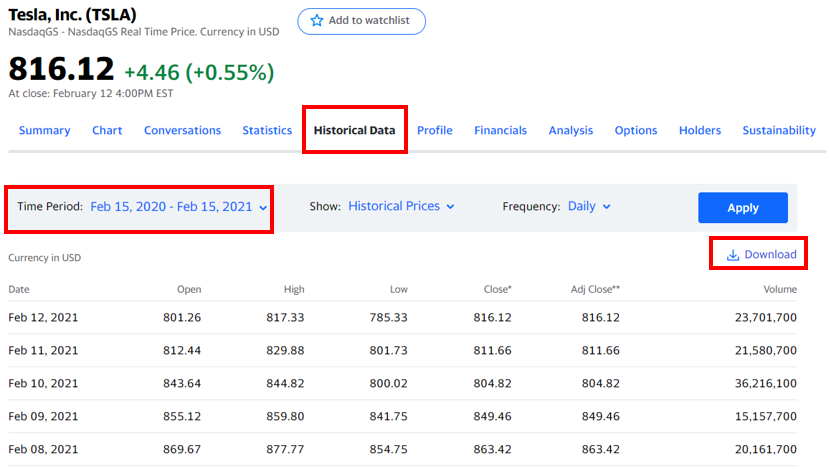

In [ ]:
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt

In [ ]:
from google_drive_downloader import GoogleDriveDownloader as gdd
# https://drive.google.com/file/d/1po_Ain1n1v5xD4C5NH5KUz5utNxAd0CR/view?usp=sharing
gdd.download_file_from_google_drive(
    file_id='1po_Ain1n1v5xD4C5NH5KUz5utNxAd0CR',
    dest_path='./TSLA.csv',
)

In [ ]:
# x가 양수라는 가정 하에 최소값과 최대값을 이용하여 0~1사이의 값으로 변환하는 함수. (Min-max Scaling)
# 너무 작거나 너무 큰 값이 학습을 방해하는 것을 방지하기 위해 정규화를 합니다.
def min_max_scaling(x):
    x_np = np.asarray(x)
    return (x_np - x_np.min()) / (x_np.max() - x_np.min() + 1e-7) # 1e-7은 0으로 나누는 오류 예방

# 정규화된 값을 원래의 값으로 되돌리는 함수.
# 정규화하기 이전의 org_x값과 되돌리고 싶은 x를 입력하면 역정규화된 값을 리턴하게 됩니다.
# 모델에서 예측한 값을 정규화되기 이전의 값으로 되돌리기 위해 필요합니다.
def reverse_min_max_scaling(org_x, x):
    org_x_np = np.asarray(org_x)
    x_np = np.asarray(x)
    return (x_np * (org_x_np.max() - org_x_np.min() + 1e-7)) + org_x_np.min()

In [ ]:
# min-max scaling 사용 예시

# random하게 생성한 데이터
x = np.random.rand(4)*100
print(x)

# minmax scaling을 적용한 데이터
x_minmax = min_max_scaling(x)
print(x_minmax)

# 이후 학습한 모델에서 나온 값을 다시 본래의 값으로 되돌리고 싶을 때
x_reverse = reverse_min_max_scaling(x, x_minmax)
print(x_reverse)

In [ ]:
# 하이퍼파라미터
seq_length = 28            # 1개 시퀀스의 길이(시계열데이터 입력 개수) / 한번 RNN을 학습시킬 때 사용할 연속적인 데이터의 수.
keep_prob = 1.0            # dropout할 때 keep할 비율

epoch_num = 200            # 에폭 횟수(학습용전체데이터를 몇 회 반복해서 학습할 것인가 입력)
learning_rate = 0.01       # 학습률

In [ ]:
# 데이터를 로딩한다.
stock_file_name = 'TSLA.csv' # 아마존 주가데이터 파일
names = ['Date','Open','High','Low','Close','Adj Close','Volume']
raw_dataframe = pd.read_csv(stock_file_name, names=names) # pandas 이용하여 csv파일 읽기

del raw_dataframe['Date'] # 시간열을 제거
stock_info = raw_dataframe.values[1:].astype(np.float) # 금액&거래량 문자열을 부동소수점(float)형으로 변환한다
print("stock_info.shape: ", stock_info.shape)
print("stock_info[0]: ", stock_info[0])

In [ ]:
# 데이터 전처리 (Min-Max Scaling)
# 가격과 거래량 수치의 차이가 많아나서 각각 별도로 정규화한다

# 가격형태 데이터들을 정규화한다
# ['Open','High','Low','Close','Adj Close','Volume']에서 'Adj Close'까지 취함
# 마지막 열 Volume를 제외한 모든 열
price = stock_info[:,:-1]
norm_price = min_max_scaling(price) # 가격형태 데이터 정규화 처리
print("price.shape: ", price.shape)
print("price[0]: ", price[0])
print("norm_price[0]: ", norm_price[0])
print("="*100) # 화면상 구분용

# 거래량형태 데이터를 정규화한다
# ['Open','High','Low','Close','Adj Close','Volume']에서 마지막 'Volume'만 취함
# [:,-1]이 아닌 [:,-1:]이므로 주의하자! 스칼라가아닌 벡터값 산출해야만 쉽게 병합 가능
volume = stock_info[:,-1:]
norm_volume = min_max_scaling(volume) # 거래량형태 데이터 정규화 처리
print("volume.shape: ", volume.shape)
print("volume[0]: ", volume[0])
print("norm_volume[0]: ", norm_volume[0])
print("="*100) # 화면상 구분용

# 행은 그대로 두고 열을 우측에 붙여 합친다
x = np.concatenate((norm_price, norm_volume), axis=1) # axis=1, 세로로 합친다
print("x.shape: ", x.shape)
print("x[0]: ", x[0])    # x의 첫 값
print("x[-1]: ", x[-1])  # x의 마지막 값
print("="*100) # 화면상 구분용

y = x[:, [-2]] # 맞히려는 target값, y는 주식 종가
print("y[0]: ",y[0])     # y의 첫 값
print("y[-1]: ",y[-1])   # y의 마지막 값

In [ ]:
dataX = [] # 입력으로 사용될 Sequence Data
dataY = [] # 출력(타켓)으로 사용

for i in range(0, len(y) - seq_length):
    _x = x[i : i+seq_length] # i 이상 i+seq_length 미만.
    _y = y[i + seq_length] # i+seq_length번째 주가 / 다음 거래일의 주가(맞히려는 값)
    # if i is 0:
    #     print(_x, "->", _y)
    dataX.append(_x) # dataX 리스트에 추가
    dataY.append(_y) # dataY 리스트에 추가

In [ ]:
# 학습용/테스트용 데이터 생성
# 전체 70%를 학습용 데이터로 사용
train_size = int(len(dataY) * 0.7)
# 나머지(30%)를 테스트용 데이터로 사용
test_size = len(dataY) - train_size

# 1년 12개월 중 앞선 70%에 해당하는 기간을 활용해 모델을 학습한 후에 그 이후 기간(나머지 30%)에 대하여 주가 예측을 해보겠습니다.

# 데이터를 잘라 학습용 데이터 생성
trainX = np.array(dataX[0:train_size])
trainY = np.array(dataY[0:train_size])

# 데이터를 잘라 테스트용 데이터 생성
testX = np.array(dataX[train_size:len(dataX)])
testY = np.array(dataY[train_size:len(dataY)])

In [ ]:
class CustomDataset(torch.utils.data.Dataset): 
  def __init__(self, x, y):
    self.x_data = x
    self.y_data = y

  # 총 데이터의 개수를 리턴
  def __len__(self): 
    return len(self.x_data)

  # 인덱스를 입력받아 그에 맵핑되는 입출력 데이터를 파이토치의 Tensor 형태로 리턴
  def __getitem__(self, idx): 
    x = torch.FloatTensor(self.x_data[idx])
    y = torch.FloatTensor(self.y_data[idx])
    return x, y

In [ ]:
train_dataset = CustomDataset(trainX, trainY)
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)

test_dataset = CustomDataset(testX, testY)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=128, shuffle=False)

In [ ]:
class RNNNet(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim=1, layers=2):
        super(RNNNet, self).__init__()
        self.rnn = torch.nn.RNN(input_dim, hidden_dim, num_layers=layers, batch_first=True)
        # batch_first - If True, input & output tensors provided as (batch, seq, feature)
        # num_layers - number of recurrent layers.
        # If set to 2, forms a stacked RNN where the second RNN takes in outputs of the first RNN and computes the final results
        
        self.fc = torch.nn.Linear(hidden_dim, output_dim, bias=True)

    def forward(self, x):
        x, _status = self.rnn(x)
        x = self.fc(x[:, -1])
        return x

In [ ]:
num_feature = 6

net = RNNNet(input_dim=num_feature, hidden_dim=16)

criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.001)

total_batch = len(train_dataloader)
print('총 배치의 수 : {}'.format(total_batch))

for epoch in range(101):
    total_loss = 0
    for batch_idx, samples in enumerate(train_dataloader):
        x_train, y_train = samples
        outputs = net(x_train)
        loss = criterion(outputs, y_train)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss
    
    if (epoch%10==0):
        print('[Epoch: {:>4}] loss = {:.10f}'.format(epoch + 1, total_loss))

In [ ]:
import matplotlib.pyplot as plt

reversed_testY = reverse_min_max_scaling(price, testY)
testX = torch.FloatTensor(testX)
prediction = net(testX).data.numpy()
reversed_prediction = reverse_min_max_scaling(price, prediction)

plt.plot(reversed_testY)
plt.plot(reversed_prediction)
plt.legend(['original', 'prediction'])
plt.show()

## 평가 : CNN으로 숫자 데이터(MNIST) 분류하기

조건에 맞는 CNN 모델을 만들고, MNIST의 test data에 대해 95% 이상의 정확도를 가지는 모델을 학습시켜보세요

torchvision에서는 다양한 이미지 데이터를 제공합니다. 제공하는 데이터셋의 목록은 아래 링크에서 더 자세히 알아보실 수 있습니다.
https://pytorch.org/vision/0.8/datasets.html (Classification 추천 데이터 : FashionMNIST, CIFAR10, CIFAR100)

torchvision에서 제공하는 데이터셋 중 하나인 MNIST는 사람들이 직접 쓴 숫자이미지의 데이터로, 모두 28*28의 크기로 이루어져 있습니다.

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

# transforms에서 data augmentation 적용.
mnist_train = torchvision.datasets.MNIST(root='MNIST_data/', # 다운로드 경로 지정
                          train=True, # True를 지정하면 훈련 데이터로 다운로드
                          transform=transforms.ToTensor(), # 텐서로 변환
                          download=True)

mnist_test = torchvision.datasets.MNIST(root='MNIST_data/', # 다운로드 경로 지정
                         train=False, # False를 지정하면 테스트 데이터로 다운로드
                         transform=transforms.ToTensor(), # 텐서로 변환
                         download=True)

In [ ]:
import matplotlib.pyplot as plt

i=1
plt.gray() 
plt.matshow(mnist_train.data[i])
for j in range(mnist_train.data[i].shape[0]):
    print(mnist_train.data[i][j].tolist())
plt.show() 

In [ ]:
learning_rate = 0.001
training_epochs = 5
batch_size = 100

torchvision에서 제공하는 dataset은 별다른 전처리 없이 바로 Dataloader에 사용이 가능합니다.

In [ ]:
train_loader = torch.utils.data.DataLoader(dataset=mnist_train,
                                          batch_size=batch_size,
                                          shuffle=True)

### 문제 : 조건에 맞는 CNN 모델을 만들고, MNIST의 test data에 대해 95% 이상의 정확도로 맞히는 모델을 학습시켜보세요

9번 13번 17번째 줄에 있는 torch.nn.Conv2d 내부의 input_dim과 output_dim에 적절한 숫자를 채우시면 됩니다.

조건

*   self.layer1 : Conv2d - input_dim=1 / output_dim=32
*   self.layer2 : Conv2d - input_dim=32 / output_dim=64
*   self.layer3 : Conv2d - input_dim=64 / output_dim=32

In [ ]:
class CNN_HW(torch.nn.Module):
    def __init__(self):
        super(CNN_HW, self).__init__()
        self.relu = torch.nn.ReLU()

        # ?는 동시에 학습되는 이미지의 개수를 의미합니다. (= batch_size)
        # L1 ImgIn shape=(?, 28, 28, 1)
        #    Conv     -> (?, 28, 28, 32)
        self.layer1 = torch.nn.Conv2d(in_channels=1, out_channels= , kernel_size=3, stride=1, padding=1)
        
        # L2 ImgIn shape=(?, 28, 28, 32)
        #    Conv      ->(?, 28, 28, 64)
        self.layer2 = torch.nn.Conv2d(in_channels=  , out_channels= , kernel_size=3, stride=1, padding=1)
        
        # L3 ImgIn shape=(?, 28, 28, 64)
        #    Conv      ->(?, 28, 28, 32)
        self.layer3 = torch.nn.Conv2d(in_channels=  , out_channels=32 , kernel_size=3, stride=1, padding=1)

        # 마지막 Conv Layer의 weight 수(28*28*32)와 같도록 FC layer의 input dimension을 설정.
        # L4 FC 28x28x32 inputs -> 625 outputs
        self.fc1 = torch.nn.Linear(28 * 28 * 32, 625, bias=True)
        
        # L5 Final FC 625 inputs -> 10 outputs
        self.fc2 = torch.nn.Linear(625, 10, bias=True)

    def forward(self, x):
        out = self.relu(self.layer1(x))
        out = self.relu(self.layer2(out))
        out = self.relu(self.layer3(out))
        out = out.view(out.size(0), -1)   # FC의 input으로 넣기 위해 Flatten하는 과정.
        out = self.relu(self.fc1(out))
        out = self.fc2(out)
        return out

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

model = CNN_HW().to(device)
criterion = torch.nn.CrossEntropyLoss().to(device)    # 비용 함수에 소프트맥스 함수 포함.
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
total_batch = len(train_loader)
print('총 배치의 수 : {}'.format(total_batch))

In [ ]:
for epoch in range(training_epochs):
    avg_loss = 0

    for X, Y in train_loader: # 미니 배치 단위로 꺼내온다. X는 미니 배치, Y는 레이블.
        # image is already size of (28x28), no reshape
        # label is not one-hot encoded
        X = X.to(device)
        Y = Y.to(device)
        optimizer.zero_grad()
        hypothesis = model(X)
        loss = criterion(hypothesis, Y)
        loss.backward()
        optimizer.step()

        avg_loss += loss / total_batch

    print('[Epoch: {:>4}] loss = {:>.9}'.format(epoch + 1, avg_loss))

**처음 보는 숫자이미지를 분류**

In [ ]:
test_loader = torch.utils.data.DataLoader(dataset=mnist_test,
                                          batch_size=500, # train할 때보다 메모리 사용량이 적어 더 큰 batch size 사용 가능.
                                          shuffle=False)

with torch.no_grad(): # 메모리 사용량이 적은 이유.
    correct = 0
    total = 0
    for X, Y in test_loader: # 미니 배치 단위로 꺼내온다. X는 미니 배치, Y는 레이블.
        # image is already size of (28x28), no reshape
        X = X.to(device)
        Y = Y.to(device)

        optimizer.zero_grad()
        output = model(X)

        _, predicted = output.max(1)           
        correct += predicted.eq(Y).sum().item()
        total += Y.size(0)
        
    accuracy = correct / total * 100.
    print(f'Test Accuracy : {accuracy}%')